<a href="https://colab.research.google.com/github/smallriver0316/python-datascience-study/blob/development/marathon_goal_time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv')
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [4]:
data.dtypes

age        int64
gender    object
split     object
final     object
dtype: object

In [6]:
# 時間データが文字列(object)として格納されているので、時間に変換する(pandasではdefaultで時間の列をPython文字列(object)として格納する)
def convert_time(x):
  return pd.to_timedelta(x)

data['split'] = data['split'].map(convert_time)
data['final'] = data['final'].map(convert_time)
data.head()

,age,gender,split,final
0,33,M,0 days 01:05:38,0 days 02:08:51
1,32,M,0 days 01:06:26,0 days 02:09:28
2,31,M,0 days 01:06:49,0 days 02:10:42
3,38,M,0 days 01:06:16,0 days 02:13:45
4,31,M,0 days 01:06:32,0 days 02:13:59


splitはフルマラソンの前半スプリット(前半を走り切るまでの経過時間)のこと

In [7]:
data.dtypes

age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

In [8]:
# Seabornで扱いやすくするために、時間を秒単位で示す
# 現在の時間がns単位なので、10^9(1E9)で割る
data['split_sec'] = data['split'].astype(int) / 1E9
data['final_sec'] = data['final'].astype(int) / 1E9
data.head()

,age,gender,split,final,split_sec,final_sec
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


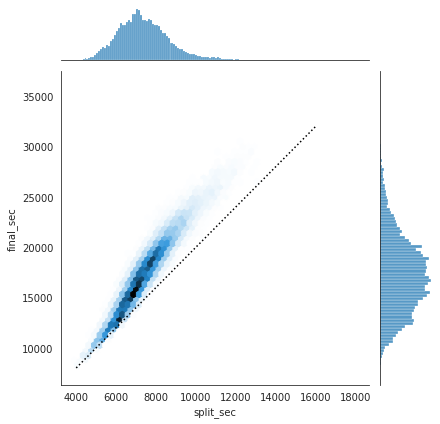

In [10]:
with sns.axes_style('white'):
  g = sns.jointplot("split_sec", "final_sec", data, kind="hex")
  g.ax_joint.plot(np.linspace(4000, 16000), np.linspace(8000, 32000), ':k')

- 前半と後半で同じペースで走ったならば、点線に沿った分布になるはず
- スプリットが長ければ長いほど、ゴールタイムはより長くなる
- つまり、分布が点線より上にあるということは、スプリット後の後半では減速してしまうということ

In [11]:
# スプリット率を計算
data['split_frac'] = 1 - 2 * data['split_sec'] / data['final_sec']
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0,-0.018756
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0,-0.026262
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0,-0.022443
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0,0.009097
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0,0.006842


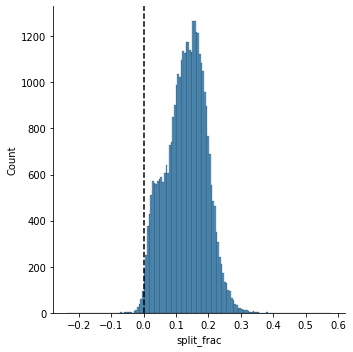

In [14]:
sns.displot(data['split_frac'], kde=False)
plt.axvline(0, color="k", linestyle="--")

In [15]:
sum(data.split_frac < 0)

251


4万人のランナーのうち、ネガティブスプリットのランナーは251人



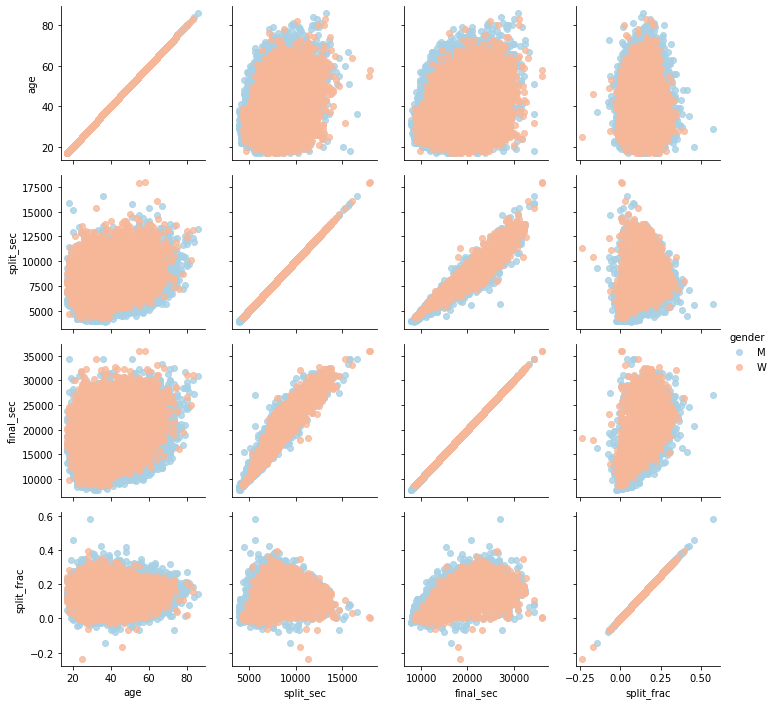

In [16]:
# スプリット率と他の変数の相関を見る
g = sns.PairGrid(data, vars=['age', 'split_sec', 'final_sec', 'split_frac'],
                 hue='gender',
                 palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend()

split_fracとfinal_secにやや相関が見て取れる？

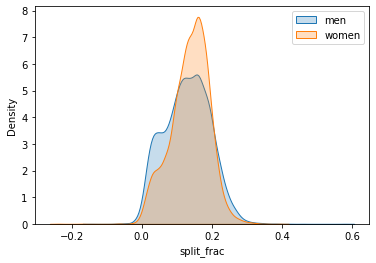

In [19]:
# 男女間のスプリット率のヒストグラムを見る
sns.kdeplot(data.split_frac[data.gender == 'M'], label='men', shade=True)
sns.kdeplot(data.split_frac[data.gender == 'W'], label='women', shade=True)
plt.xlabel('split_frac')
plt.legend()

男性の方が均等な走り方をしていることが分かる

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


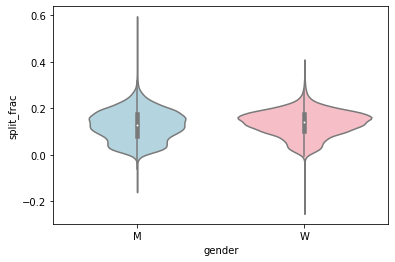

In [20]:
sns.violinplot("gender", "split_frac", data=data, palette=["lightblue", "lightpink"])

In [21]:
# さらに年齢に着目する
data['age_dec'] = data.age.map(lambda age: 10 * (age // 10))
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac,age_dec
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0,-0.018756,30
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0,-0.026262,30
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0,-0.022443,30
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0,0.009097,30
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0,0.006842,30


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


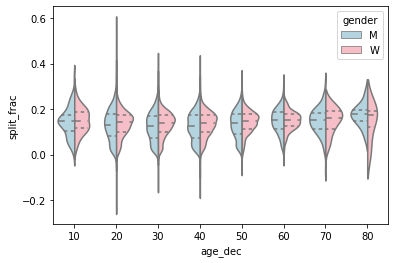

In [22]:
men = (data.gender == 'M')
women = (data.gender == 'W')

with sns.axes_style(style=None):
  sns.violinplot("age_dec", "split_frac", hue="gender", data=data, split=True, inner="quartile", palette=["lightblue", "lightpink"])



*   女性の方が比較的、高いスプリット率に集中している
*   80代の女性は男性よりスプリット率が安定しているように見える -> 確認する



In [36]:
(data.age > 80).sum()

7

In [45]:
len(data.query('age > 80 & gender == "W"'))

2

80歳以上についてはサンプル数が少なすぎたことが分かる

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


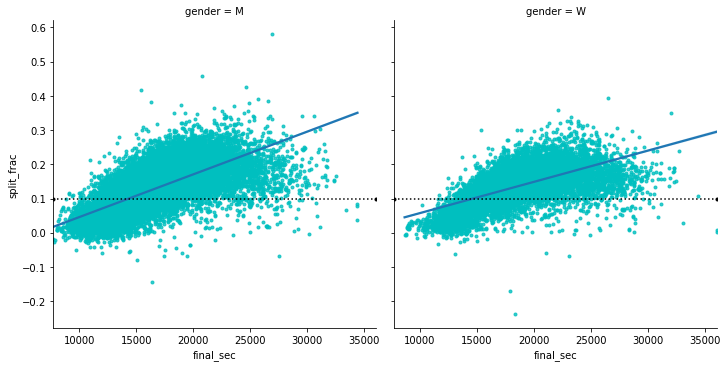

In [39]:
g = sns.lmplot('final_sec', 'split_frac', col='gender', data=data, markers=".", scatter_kws=dict(color='c'))
g.map(plt.axhline, y=0.1, color="k", ls=":")
g.set_xlabels('final_sec')
g.set_ylabels('split_frac')

スプリット率が負の値のランナーは15000秒(約4時間)以内にゴールしていることが分かる

つまり、前半で体力を温存していたランナーの方が、早くゴールできているということ